In [1]:
import numpy as np
import matplotlib.image as img
# from IPython.display import Image
from PIL import Image

In [2]:
class Steganograph:
    
    def __init__(self, image, name='Image1'):
        self.name = name
        self.image = img.imread(image)
        self.height = self.image.shape[0]
        self.width = self.image.shape[1]
        self.shape = self.image.shape
        self.binary_image = np.zeros(self.shape, dtype=np.int)
        self.strong_slice = np.zeros(self.shape, dtype=np.int)
        self.weak_slice = np.zeros(self.shape, dtype=np.int)
        self.merged_strong = np.zeros(self.shape, dtype=np.int)
        self.merged_weak = np.zeros(self.shape, dtype=np.int)
        self.strong_proof = np.zeros(self.shape, dtype=np.int)
        self.weak_proof = np.zeros(self.shape, dtype=np.int)
        self.red_channel = np.zeros(self.shape, dtype=np.int)
        self.green_channel = np.zeros(self.shape, dtype=np.int)
        self.blue_channel = np.zeros(self.shape, dtype=np.int)
        self._convert_img_to_binary()
        self._convert_to_slice()
        self._separate_channels()
    
    @staticmethod
    def generate_binary(r, g, b, padding=8):
        return np.binary_repr(r, width=padding), np.binary_repr(g, width=padding), np.binary_repr(b, width=padding)
        
    @staticmethod
    def generate_slice(r, g, b, bits=8, slicer=4, of='strong'):
        r, g, b = str(r), str(g), str(b)
        if of == 'weak':
            return int(r.zfill(bits)[slicer:]), int(g.zfill(bits)[slicer:]), int(b.zfill(bits)[slicer:])
        return int(r.zfill(bits)[:slicer]), int(g.zfill(bits)[:slicer]), int(b.zfill(bits)[:slicer])

    def _separate_channels(self):
        for row in range(self.height):
            for col in range(self.width):
                r, b, g = self.image[row][col]
                self.red_channel[row][col] = r, 0, 0
                self.green_channel[row][col] = 0, b, 0
                self.blue_channel[row][col] = 0, 0, g
        print("Finished!")
    
    def _convert_img_to_binary(self):
        for row in range(self.height):
            for col in range(self.width):
                r, g, b = self.image[row][col]
                self.binary_image[row][col] = self.generate_binary(r, g, b)
    
    def _convert_to_slice(self):
        self._convert_img_to_binary()
        for row in range(self.height):
            for col in range(self.width):
                r, g, b = self.binary_image[row][col]
                self.weak_slice[row][col] = self.generate_slice(r, g, b, of='weak')
        for row in range(self.height):
            for col in range(self.width):
                r, g, b = self.binary_image[row][col]
                self.strong_slice[row][col] = self.generate_slice(r, g, b)
    
    def merge(self, image2):
        for row in range(self.height):
            for col in range(self.width):
                r1, g1, b1 = self.weak_slice[row][col]
                r1, g1, b1 = str(r1), str(g1), str(b1)
                r2, g2, b2 = image2.weak_slice[row][col]
                r2, g2, b2 = str(r2), str(g2), str(b2)
                self.merged_weak[row][col] = int(r1.zfill(4) + r2.zfill(4)), int(g1.zfill(4) + g2.zfill(4)), int(b1.zfill(4) + b2.zfill(4))

        for row in range(self.height):
            for col in range(self.width):
                r1, g1, b1 = self.strong_slice[row][col]
                r1, g1, b1 = str(r1), str(g1), str(b1)
                r2, g2, b2 = image2.strong_slice[row][col]
                r2, g2, b2 = str(r2), str(g2), str(b2)
                self.merged_strong[row][col] = int(r1.zfill(4) + r2.zfill(4)), int(g1.zfill(4) + g2.zfill(4)), int(b1.zfill(4) + b2.zfill(4))
        return self._compute()
        
    def _compute(self):
        for row in range(self.height):
            for col in range(self.width):
                r, g, b = self.merged_weak[row][col]
                self.weak_proof[row][col] = int(str(r), 2), int(str(g), 2), int(str(b), 2)
        
        for row in range(self.height):
            for col in range(self.width):
                r, g, b = self.merged_strong[row][col]
                self.strong_proof[row][col] = int(str(r), 2), int(str(g), 2), int(str(b), 2)
    
    def show(self, strength='strong'):
        if strength == 'weak':
            return Image.fromarray(self.weak_proof.astype(dtype=np.uint8), mode='RGB')
        return Image.fromarray(self.strong_proof.astype(dtype=np.uint8), mode='RGB')

    
    def show_channel(self, color='red'):
        if color == 'blue':
            return Image.fromarray(self.blue_channel.astype(dtype=np.uint8), mode='RGB')
        elif color == 'green':
            return Image.fromarray(self.green_channel.astype(dtype=np.uint8), mode='RGB')
        return Image.fromarray(self.red_channel.astype(dtype=np.uint8), mode='RGB')

In [3]:
img1 = 'pre_images/img1.jpg'
img2 = 'pre_images/im2.jpg'

In [4]:
s = Steganograph(img1)
t = Steganograph(img2, name='Image2')

Finished!
Finished!


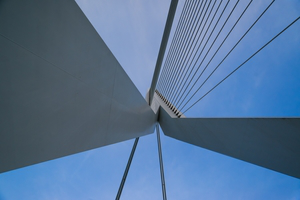

In [5]:
Image.open(img1)

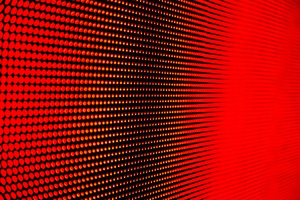

In [6]:
Image.open(img2)

In [7]:
s.merge(t)

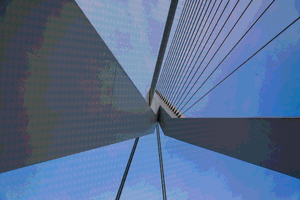

In [8]:
s.show()

In [9]:
t.merge(s)

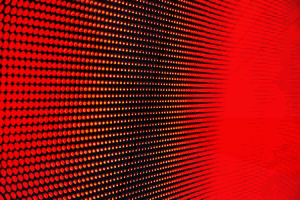

In [10]:
t.show()

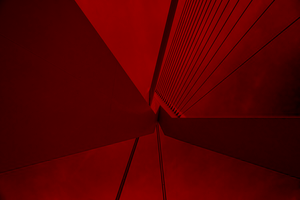

In [11]:
s.show_channel(color='red')

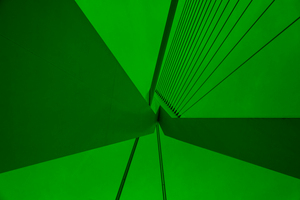

In [12]:
s.show_channel(color='green')

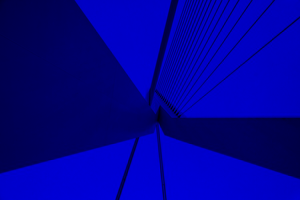

In [13]:
s.show_channel(color='blue')

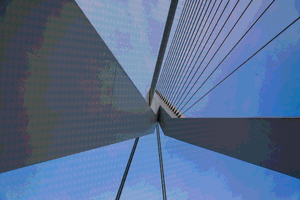

In [14]:
s.show()

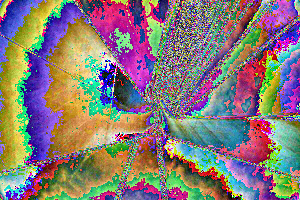

In [15]:
s.show(strength='weak')

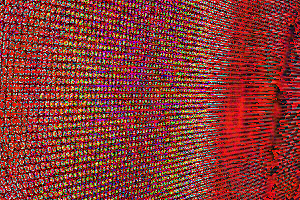

In [16]:
t.show(strength='weak')

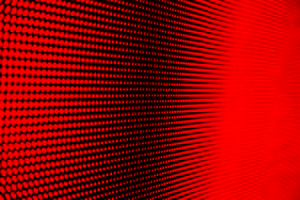

In [17]:
t.show_channel(color='red')

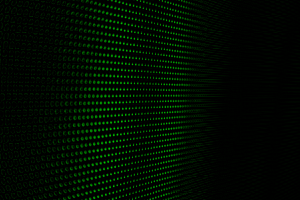

In [18]:
t.show_channel(color='green')

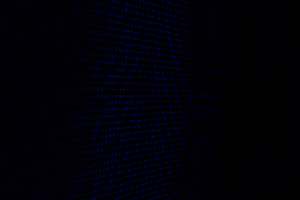

In [19]:
t.show_channel(color='blue')